In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [2]:
tips = sns.load_dataset("tips")

x = tips[["total_bill", "size"]]
y = tips["tip"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("訓練集比數:", x_train.shape[0])
print("測試集比數:", x_test.shape[0])

訓練集比數: 195
測試集比數: 49


In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
rf=RandomForestRegressor(max_depth=3,min_samples_split=0.3,n_estimators=5)
svr=SVR(C=1,gamma=0.1,kernel="linear")

rf.fit(x_train,y_train)
rf_predict=rf.predict(x_test)

svr.fit(x_train,y_train)
svr_prd=svr.predict(x_test)

In [5]:
# model1=GridSearchCV(estimator=rf,
#                    cv=5,
#                    scoring="r2",
#                    verbose=3,
#                    param_grid={"n_estimators":[5,10,20,30,40,50,60],
#                                "max_depth":[3,4,5,6,7,8],
#                                "min_samples_split":[0.2,0.3,0.4,0.5,0.6]})

# model1.fit(x_train,y_train)

In [6]:
# model1.best_estimator_

In [7]:
# parameters=[{"C": [1,10,100,1000],"kernel":["rbf","linear"],"gamma": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
# model2=GridSearchCV(estimator=svr,
#                     cv=5,
#                     param_grid={"C":[1,10,100,1000],
#                                 "kernel":["rbf","linear"],
#                                 "gamma":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]})

# model2.fit(x_train,y_train)

In [8]:
# model2.best_estimator_

In [9]:
#計算MAPE
def calculate_mape(y_true, y_predd):
    absolute_percentage_error = np.abs((y_true - y_predd) / y_true)
    mape = np.mean(absolute_percentage_error) * 100
    return mape

In [10]:
rf_mse = mean_squared_error(y_test, rf_predict)
rf_r2 = r2_score(y_test, rf_predict)

svr_mse = mean_squared_error(y_test, svr_prd)
svr_r2 = r2_score(y_test, svr_prd)

rf_mape = calculate_mape(y_test,rf_predict)
svr_mape = calculate_mape(y_test,svr_prd)

print("RandomForest的mse:",rf_mse)
print("RandomForest的r2:",rf_r2)
print("RandomForest的mape:",rf_mape)

print("SVR的mse:",svr_mse)
print("SVR的r2:",svr_r2)
print("SVR的mape:",svr_mape)

RandomForest的mse: 0.8452716852680195
RandomForest的r2: 0.32376714997131306
RandomForest的mape: 32.76236323856272
SVR的mse: 0.689700910385633
SVR的r2: 0.4482266229590187
SVR的mape: 26.84665346840199


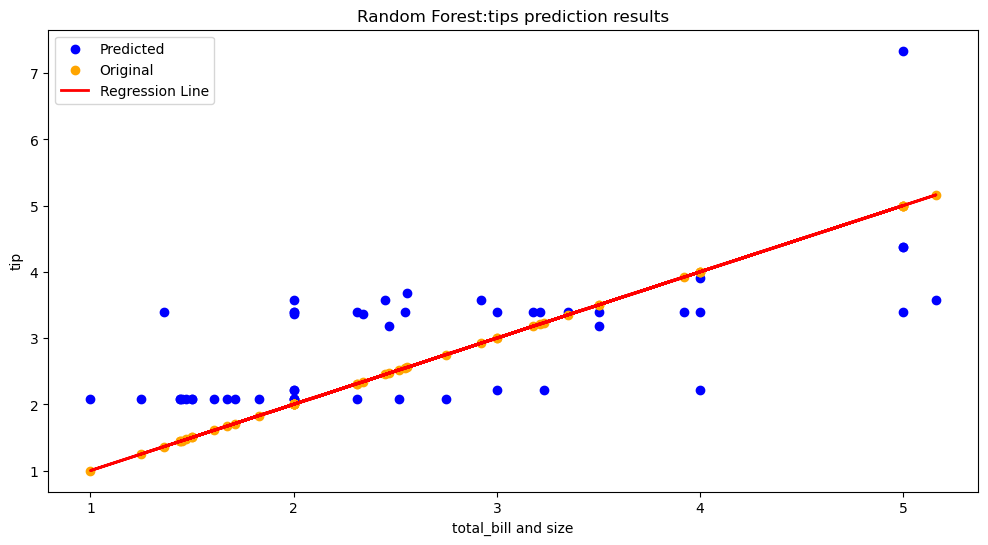

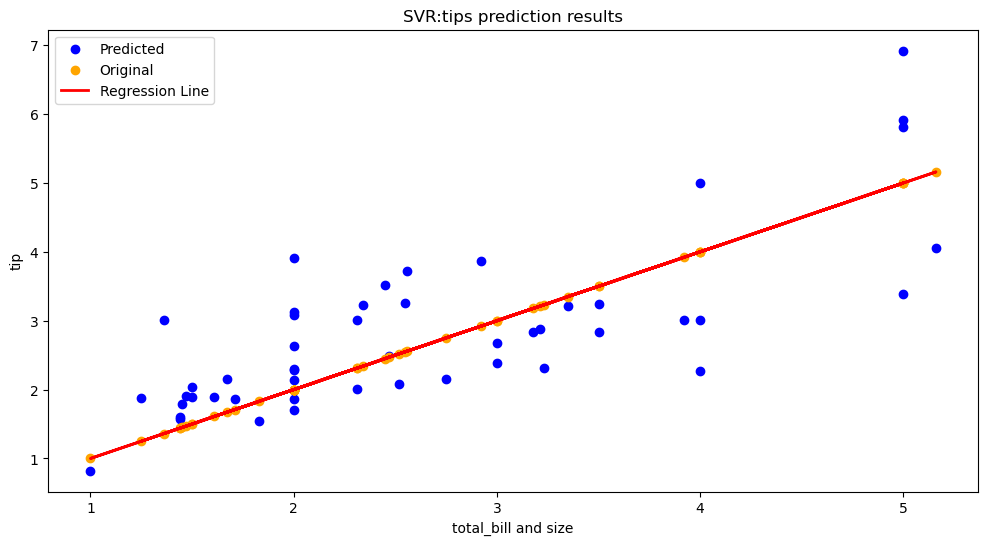

In [11]:
# 可視化預測結果(隨機森林)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_predict, color="blue")
plt.scatter(y_test, y_test, color="orange")
plt.plot(y_test,y_test, color="red", linewidth=2)
plt.legend(["Predicted","Original","Regression Line"])
plt.xlabel("total_bill and size")
plt.ylabel("tip")
plt.title("Random Forest:tips prediction results")
plt.show()

# 可視化預測結果(SVR)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, svr_prd, color="blue")
plt.scatter(y_test, y_test, color="orange")
plt.plot(y_test,y_test, color="red", linewidth=2)
plt.legend(["Predicted","Original","Regression Line"])
plt.xlabel("total_bill and size")
plt.ylabel("tip")
plt.title("SVR:tips prediction results")
plt.show()